In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
cols = ['goods_id', 'user_id', 'rating', 'ts']
df = pd.read_csv('All_Beauty.csv', names = cols).head(1000)

# R = pd.crosstab(index=df['user_id'],
#                 columns=df['goods_id'],
#                 values=df['rating'],
#                 aggfunc='mean').fillna(0).values
# print(R.shape)

In [8]:
def getMatrix(df, index, column, rating):
    '''
    inputs: pd.DataFrame
           index column name
           columns column name
           rating column name
    :return: A, R user-item matrices
    '''
    A = df.pivot_table(columns=[column], index=[index], values=rating).fillna(0).values

    print("'A' matrix shape is", A.shape)

    print("Getting 'R' Binary Matrix of rating or no rating...")
    R = A>0.5
    R[R == True] = 1
    R[R == False] = 0
    R = R.astype(np.float64, copy=False)

    return A, R


def get_error(A, Users, Items, R):
    # calculate the MSE of nonzero elements
    return np.sum((R * (A - np.dot(Users, Items))) ** 2) / np.sum(R)
    

def calcALS(A, R, n_factors, n_iterations, lambda_):
    '''
    Runs Alternating Least Squares algorithm in order to calculate matrix.
    
    inputs: A: User-Item Matrix with ratings
            R: User-Item Matrix with 1 if there is a rating or 0 if not
            n_factors: How many factors each of user and item matrix will consider
            n_iterations: How many times to run algorithm
            lambda_: Regularization parameter
    
    :return:
            None
    '''
    print("Initiating ")
    lambda_ = 0.1
    n_factors = A.shape[0]
    n, m = A.shape
    n_iterations = 15
    
    Users = 5 * np.random.rand(n, n_factors)
    Items = 5 * np.random.rand(n_factors, m)


    MSE_List = []

    print("Starting Iterations")
    for iter in range(n_iterations):
        
        ###########################
        # filter part
        # add context as an another items here
        ###########################
        
        for i, Ri in enumerate(R):
            Users[i] = np.linalg.solve(np.dot(Items, 
                                              np.dot(np.diag(Ri), 
                                                     Items.T)) + lambda_ * np.eye(n_factors),
                                       np.dot(Items, 
                                              np.dot(np.diag(Ri),
                                                     A[i].T))).T
            
        print("Error after solving for User Matrix:", get_error(A, Users, Items, R))

        for j, Rj in enumerate(R.T):
            Items[:,j] = np.linalg.solve(np.dot(Users.T,
                                                np.dot(np.diag(Rj),
                                                       Users)) + lambda_ * np.eye(n_factors),
                                     np.dot(Users.T,
                                            np.dot(np.diag(Rj),
                                                   A[:, j])))
            
        print("Error after solving for Item Matrix:", get_error(A, Users, Items, R))

        MSE_List.append(get_error(A, Users, Items, R))
        print('%sth iteration is complete...' % iter)

    print(MSE_List)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(range(1, len(MSE_List) + 1), MSE_List); plt.ylabel('Error'); plt.xlabel('Iteration')
    plt.title('Python Implementation MSE by Iteration \n with %d users and %d items' % A.shape)
    plt.show()

'A' matrix shape is (4, 1000)
Getting 'R' Binary Matrix of rating or no rating...
Initiating 
Starting Iterations
Error after solving for User Matrix: 2.299229854524031
Error after solving for Item Matrix: 0.30098258838283565
0th iteration is complete...
Error after solving for User Matrix: 1.3811508406494528e-06
Error after solving for Item Matrix: 0.19336863995188328
1th iteration is complete...
Error after solving for User Matrix: 1.5814901002359579e-06
Error after solving for Item Matrix: 0.13526195435164315
2th iteration is complete...
Error after solving for User Matrix: 1.7954333343664334e-06
Error after solving for Item Matrix: 0.10015447972491746
3th iteration is complete...
Error after solving for User Matrix: 2.0225047054407876e-06
Error after solving for Item Matrix: 0.07725660290326952
4th iteration is complete...
Error after solving for User Matrix: 2.2622144005807553e-06
Error after solving for Item Matrix: 0.06146573171165025
5th iteration is complete...
Error after sol

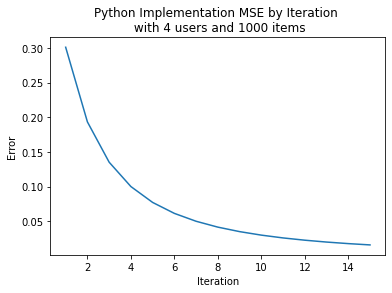

In [9]:
A, R = getMatrix(df, 'goods_id', 'user_id', 'rating')
calcALS(A, R, n_factors = 3, n_iterations = 20, lambda_ = .1)